In [26]:
import pandas as pd

In [27]:
df=pd.read_csv("train.csv")

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.shape

(891, 12)

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
cabin_miss_pourc= df['Cabin'].isnull().mean() * 100

In [33]:
print (f"the pourcentage of missing values for cabin is {cabin_miss_pourc:.2f}% ")

the pourcentage of missing values for cabin is 77.10% 


In [34]:
age_miss_pourc= df['Age'].isnull().mean() * 100

In [35]:
print (f"the pourcentage of missing values for age is {age_miss_pourc:.2f}% ")

the pourcentage of missing values for age is 19.87% 


In [37]:
embarked_miss_pourc= df['Embarked'].isnull().mean() * 100

In [38]:
print (f"the pourcentage of missing values for embarked is {embarked_miss_pourc:.2f}% ")

the pourcentage of missing values for embarked is 0.22% 


In [36]:
df = df.drop('Cabin', axis=1)

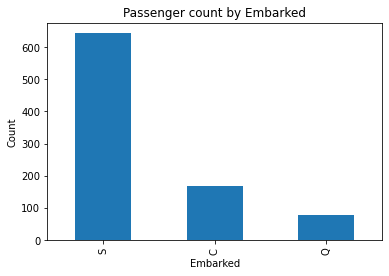

In [39]:
import matplotlib.pyplot as plt

# load your dataframe into the variable df
# ...

# create a bar plot of the Embarked column
df['Embarked'].value_counts().plot(kind='bar')

# set the title and axis labels
plt.title('Passenger count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# display the plot
plt.show()


In [44]:
df['Embarked'] = df['Embarked'].fillna('S')

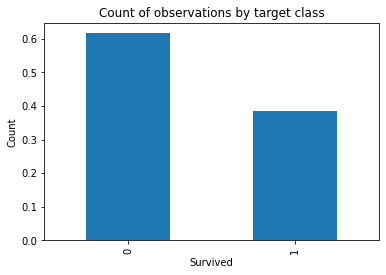

In [50]:
# create a bar plot of the target class
df['Survived'].value_counts(normalize=True).plot(kind='bar')

# set the title and axis labels
plt.title('Count of observations by target class')
plt.xlabel('Survived')
plt.ylabel('Count')

# display the plot
plt.show() 

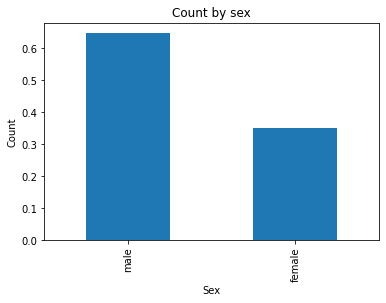

In [51]:
# create a bar plot of the target class
df['Sex'].value_counts(normalize=True).plot(kind='bar')

# set the title and axis labels
plt.title('Count by sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# display the plot
plt.show() 

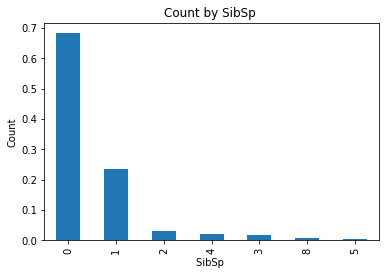

In [53]:
# create a bar plot of the target class
df['SibSp'].value_counts(normalize=True).plot(kind='bar')

# set the title and axis labels
plt.title('Count by SibSp ')
plt.xlabel('SibSp ')
plt.ylabel('Count')

# display the plot
plt.show() 

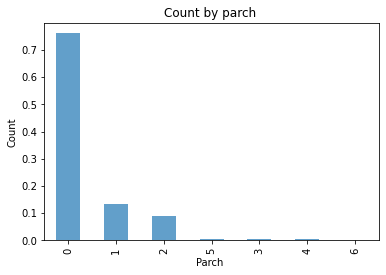

In [55]:
# create a bar plot of the target class
df['Parch'].value_counts(normalize=True).plot(kind='bar')

# set the title and axis labels
plt.title('Count by parch ')
plt.xlabel('Parch ')
plt.ylabel('Count')

# display the plot
plt.show() 

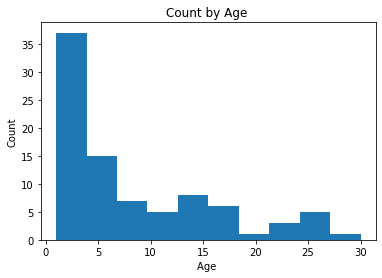

In [60]:
# create a bar plot of the target class
df['Age'].value_counts().plot(kind='hist')

# set the title and axis labels
plt.title('Count by Age ')
plt.xlabel('Age ')
plt.ylabel('Count')

# display the plot
plt.show() 

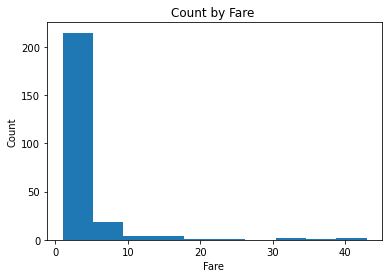

In [61]:
# create a bar plot of the target class
df['Fare'].value_counts().plot(kind='hist')

# set the title and axis labels
plt.title('Count by Fare ')
plt.xlabel('Fare ')
plt.ylabel('Count')

# display the plot
plt.show() 

Text(0.5, 1.0, 'Age vs Female')

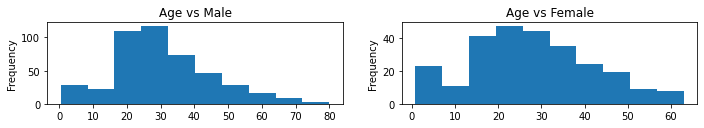

In [67]:
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0))
df['Age'][(df['Sex']=='male')].plot(kind='hist')

plt.title('Age vs Male')
plt.subplot2grid((3,3), (0,1))
df['Age'][(df['Sex']=='female')].plot(kind='hist')
plt.title('Age vs Female')

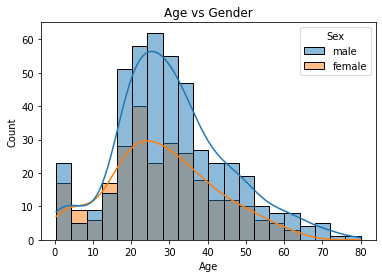

In [68]:
import seaborn as sns

sns.histplot(data=df, x='Age', hue='Sex', kde=True)
plt.title('Age vs Gender')
plt.show()


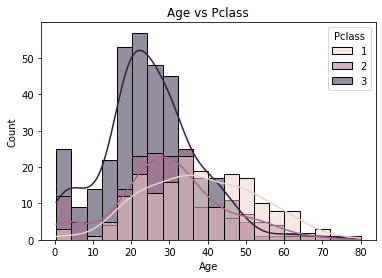

In [70]:
import seaborn as sns

sns.histplot(data=df, x='Age', hue='Pclass', kde=True)
plt.title('Age vs Pclass')
plt.show()


In [71]:
df["Age"] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

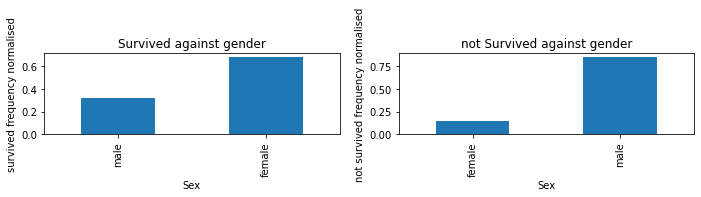

In [76]:
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)
plt.subplot2grid((3,3), (0,0))

# create a bar plot of the target class
df['Sex'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('Survived against gender')
plt.xlabel('Sex')
plt.ylabel('survived frequency normalised')
plt.subplot2grid((3,3), (0,1))
df['Sex'][df['Survived']==0].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('not Survived against gender')
plt.xlabel('Sex')
plt.ylabel('not survived frequency normalised')



# display the plot
plt.show() 

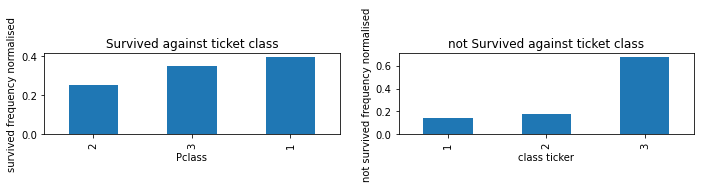

In [78]:
# survived against ticket class

fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)
plt.subplot2grid((3,3), (0,0))

# create a bar plot of the target class
df['Pclass'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('Survived against ticket class')
plt.xlabel('Pclass')
plt.ylabel('survived frequency normalised')
plt.subplot2grid((3,3), (0,1))
df['Pclass'][df['Survived']==0].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('not Survived against ticket class')
plt.xlabel('class ticker')
plt.ylabel('not survived frequency normalised')



# display the plot
plt.show()


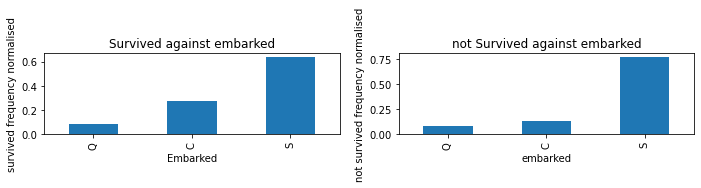

In [79]:
# survived against ticket class

fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)
plt.subplot2grid((3,3), (0,0))

# create a bar plot of the target class
df['Embarked'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('Survived against embarked')
plt.xlabel('Embarked')
plt.ylabel('survived frequency normalised')
plt.subplot2grid((3,3), (0,1))
df['Embarked'][df['Survived']==0].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('not Survived against embarked')
plt.xlabel('embarked')
plt.ylabel('not survived frequency normalised')



# display the plot
plt.show()


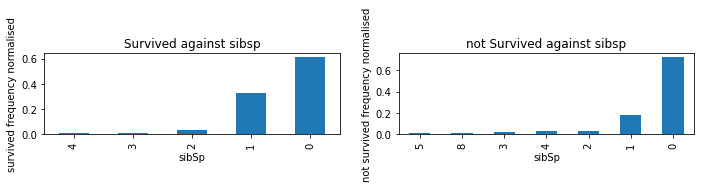

In [81]:
# survived against ticket class

fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)
plt.subplot2grid((3,3), (0,0))

# create a bar plot of the target class
df['SibSp'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('Survived against sibsp')
plt.xlabel('sibSp')
plt.ylabel('survived frequency normalised')
plt.subplot2grid((3,3), (0,1))
df['SibSp'][df['Survived']==0].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('not Survived against sibsp')
plt.xlabel('sibSp')
plt.ylabel('not survived frequency normalised')



# display the plot
plt.show()


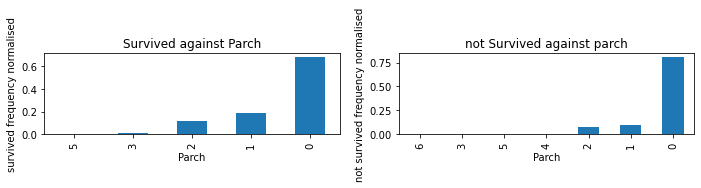

In [82]:
# survived against ticket class

fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)
plt.subplot2grid((3,3), (0,0))

# create a bar plot of the target class
df['Parch'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('Survived against Parch')
plt.xlabel('Parch')
plt.ylabel('survived frequency normalised')
plt.subplot2grid((3,3), (0,1))
df['Parch'][df['Survived']==0].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('not Survived against parch')
plt.xlabel('Parch')
plt.ylabel('not survived frequency normalised')



# display the plot
plt.show()


# Feature  engineering

In previous graph we have seen, both Sibsp and Parch are having similar influence on Survival. Lets calculate if passenger travelled alone or with family. Instead of 2 separate features, lets combine SibSp and Parch and create a new feature named FamilySize.

In [83]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [85]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [86]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
#we are goin to ignore the cabin feature only afe and fare!!!

test["Age"] = test.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test["Fare"] = test["Fare"].fillna(test["Fare"].dropna().median())   
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [88]:
test.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [95]:
X_train = df[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]

In [96]:
#categeical variables encoding 
labels_to_encode = ['Pclass', 'Sex', 'Embarked']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)
y = df['Survived'].values

In [97]:
X_train.head(1)

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.25,2,0,0,1,0,1,0,0,1


In [98]:
X_test.head(1)

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,0,0,1,0,1,0,1,0


In [113]:
from sklearn.linear_model import LogisticRegression            # for Machine Learning algorithms (Logistic Regression)
from sklearn.model_selection import cross_val_score            # for Cross validation score
from sklearn.ensemble import RandomForestClassifier            # for Machine Learning algorithms (Random Forest)
from sklearn.svm import SVC    

In [117]:
#traina model
lr_model =  LogisticRegression(solver='liblinear')


In [118]:
scores = cross_val_score(lr_model, X_train, y, cv=5)
print(round(np.mean(scores*100)))
lr_model.fit(X_train,y)
predictions_lr = lr_model.predict(X_test)
submission_lr = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_lr
})
submission_lr.to_csv('titanic_lr2.csv', index=False)

80


In [126]:
from sklearn.ensemble import RandomForestClassifier   

In [127]:

rfclr = RandomForestClassifier(n_estimators=100, max_depth = 7)
scores = cross_val_score(rfclr, X_train, y, cv=5)
print(round(np.mean(scores*100)))
rfclr.fit(X_train, y)
predictions_rf = rfclr.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_rf
})
submission_rf.to_csv('titanic_dt.csv', index=False)
     

82


In [128]:
svm_model = SVC(kernel='linear')

In [130]:
scores = cross_val_score(svm_model, X_train, y, cv=5)
print(round(np.mean(scores*100)))
svm_model.fit(X_train, y)
predictions_svm = svm_model.predict(X_test)
submission_svm = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_svm
})
submission_svm.to_csv('titanic_svm.csv', index=False)
     

79


In [ ]:
#Random forest was the best classifier